In [1]:
import json
from collections import Counter

In [2]:
json_file_path = "intent.json"

In [3]:
try:
    with open(json_file_path, "r") as file:
        training_data = json.load(file)
    print("JSON file loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {json_file_path}. Please check the path.")

JSON file loaded successfully.


In [4]:
training_data["intents"][:2] 

[{'tag': 'greeting',
  'patterns': ['Hello',
   'yo',
   'Hi',
   'Hey',
   'Good morning',
   'Good afternoon',
   'Good evening',
   "What's up?",
   "How's it going?",
   'Hey there',
   'Greetings',
   'Hi there!',
   'Hello, how are you?',
   "Hey, what's new?",
   'Howdy!',
   'Hello there!',
   "Hey, how's your day?",
   'Hiya!',
   'Good to see you',
   'How are you doing?',
   "Hi, what's up?",
   'Hello, can you help me?',
   "Hey, how's it going?",
   'Hello, nice to meet you',
   'Hi, how can you assist me?',
   'Hey there, chatbot',
   "Hi, I hope you're doing well",
   "Hi, it's nice to talk to you",
   'Hello! Are you there?',
   'Hi, just checking in!',
   'Good day, how can you help me?',
   'Namaste'],
  'responses': ['Hello! How can I assist you today?',
   'Hi there! How can I help?',
   'Hey! What can I do for you?',
   'Hello! What do you need help with today?']},
 {'tag': 'farewell',
  'patterns': ['Bye',
   'Goodbye',
   'See you later',
   "I'm leaving",
   'Ta

## PREPROCESSING THE DATA

In [5]:
import re

patterns = []
intents = []


In [6]:
for intent in training_data["intents"]:
    for pattern in intent["patterns"]:
        patterns.append(pattern)
        intents.append(intent["tag"])

# Display a sample of patterns and intents to verify extraction
print("Sample patterns:", patterns[:5])
print("Sample intents:", intents[:5])

Sample patterns: ['Hello', 'yo', 'Hi', 'Hey', 'Good morning']
Sample intents: ['greeting', 'greeting', 'greeting', 'greeting', 'greeting']


In [7]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

In [8]:
# Apply cleaning to all patterns
cleaned_patterns = [clean_text(pattern) for pattern in patterns]

print("\nSample cleaned patterns:", cleaned_patterns[:50])


Sample cleaned patterns: ['hello', 'yo', 'hi', 'hey', 'good morning', 'good afternoon', 'good evening', 'whats up', 'hows it going', 'hey there', 'greetings', 'hi there', 'hello how are you', 'hey whats new', 'howdy', 'hello there', 'hey hows your day', 'hiya', 'good to see you', 'how are you doing', 'hi whats up', 'hello can you help me', 'hey hows it going', 'hello nice to meet you', 'hi how can you assist me', 'hey there chatbot', 'hi i hope youre doing well', 'hi its nice to talk to you', 'hello are you there', 'hi just checking in', 'good day how can you help me', 'namaste', 'bye', 'goodbye', 'see you later', 'im leaving', 'take care', 'catch you later', 'see ya', 'have a good day', 'im off', 'talk to you soon', 'byebye', 'later', 'farewell', 'see you next time', 'gotta go', 'im out', 'take it easy', 'peace out']


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to preprocess text
def preprocess_text(text):
    # Tokenize by splitting on non-alphabetic characters
    tokens = re.findall(r'\b\w+\b', text.lower())
    # Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return processed_tokens

# Sample cleaned patterns
cleaned_patterns
# Apply preprocessing to all cleaned patterns
tokenized_patterns = [preprocess_text(pattern) for pattern in cleaned_patterns]

print("Sample tokenized patterns:", tokenized_patterns[:5])


Sample tokenized patterns: [['hello'], ['yo'], ['hi'], ['hey'], ['good', 'morning']]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to convert text to a matrix of token counts
vectorizer = CountVectorizer()

# Fit the vectorizer on the tokenized patterns
X = vectorizer.fit_transform([' '.join(pattern) for pattern in tokenized_patterns])

# Convert the feature matrix to a list of feature names (words)
words = vectorizer.get_feature_names_out()

# Print out some features to inspect
print("Feature names (words):", words[:10])


Feature names (words): ['accept' 'accepted' 'accessory' 'account' 'adios' 'afternoon' 'alright'
 'amber' 'analog' 'appliance']


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode intents
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(intents)

print("Encoded labels:", y[:50])


Encoded labels: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Test the classifier and print accuracy
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 79.39%


In [15]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 376 stored elements and shape (175, 283)>

In [16]:
y_test

array([ 1,  5,  8,  1,  3,  5,  1,  9,  9,  1,  5,  2,  1,  1,  3,  3,  1,
       11,  4,  1,  9,  6,  6,  5,  9,  9,  5,  5,  8,  9,  1,  5,  2,  1,
        1,  1,  5,  9,  1,  3,  5,  9,  0,  9,  8,  9,  1,  5,  8,  9,  9,
        1,  1,  9,  9,  2,  6,  5,  1,  9,  5,  9,  3,  3,  6,  1,  5,  9,
        1, 10,  1,  5,  1,  6,  1,  9,  1,  9,  1,  9,  9,  1,  9,  9,  9,
        9,  8,  0,  1,  5,  8,  1,  1,  8,  3,  9,  6,  0,  4,  9,  8,  1,
        2,  9,  1,  1,  1,  9,  1,  3,  9,  7,  1,  1,  1,  9,  3,  6,  8,
        3,  1,  1,  1,  3,  9,  5,  1,  0,  9, 11,  3,  5,  1,  8,  1,  1,
        9,  9,  0,  9,  2,  1,  9,  1,  1,  1,  5,  3,  9,  9,  8,  9,  8,
        8,  0,  1,  5,  9,  5,  1, 10,  3,  9,  9,  1,  1,  5,  1,  8,  1,
        1,  1,  9,  1,  5])

In [17]:
y_pred

array([1, 1, 8, 1, 3, 5, 1, 9, 9, 1, 5, 1, 8, 1, 3, 3, 1, 3, 4, 1, 9, 5,
       1, 5, 9, 9, 5, 5, 8, 9, 1, 5, 3, 1, 1, 1, 5, 9, 1, 3, 5, 9, 1, 9,
       8, 9, 1, 5, 8, 9, 9, 1, 1, 9, 9, 1, 1, 5, 1, 9, 5, 9, 3, 5, 1, 1,
       5, 9, 1, 1, 1, 5, 1, 1, 1, 9, 1, 9, 1, 9, 9, 1, 9, 9, 9, 9, 8, 1,
       1, 5, 8, 1, 1, 8, 3, 9, 3, 1, 9, 1, 8, 1, 2, 9, 1, 1, 1, 9, 1, 3,
       9, 1, 1, 1, 1, 9, 3, 1, 8, 3, 1, 1, 1, 3, 9, 1, 1, 1, 9, 8, 3, 5,
       1, 8, 1, 1, 9, 9, 0, 9, 2, 1, 9, 1, 1, 1, 5, 3, 9, 9, 8, 9, 8, 8,
       1, 1, 5, 9, 5, 1, 9, 3, 9, 9, 1, 1, 5, 1, 8, 1, 1, 1, 9, 1, 5])

In [18]:
def predict_intent(query):
    # Preprocess the query
    query_tokens = preprocess_text(query)
    query_bow = vectorizer.transform([' '.join(query_tokens)])

    # Predict the intent
    predicted_class = nb_classifier.predict(query_bow)
    predicted_intent = label_encoder.inverse_transform(predicted_class)
    
    return predicted_intent[0]

# Test the prediction function
user_query = "Do you have watch?"
predicted_intent = predict_intent(user_query)
print(f"Predicted intent for the query '{user_query}': {predicted_intent}")


Predicted intent for the query 'Do you have watch?': category_search


In [19]:
user_query = "watch"
predicted_intent = predict_intent(user_query)


print(f"Predicted intent for the query '{user_query}': {predicted_intent}")


Predicted intent for the query 'watch': category_search


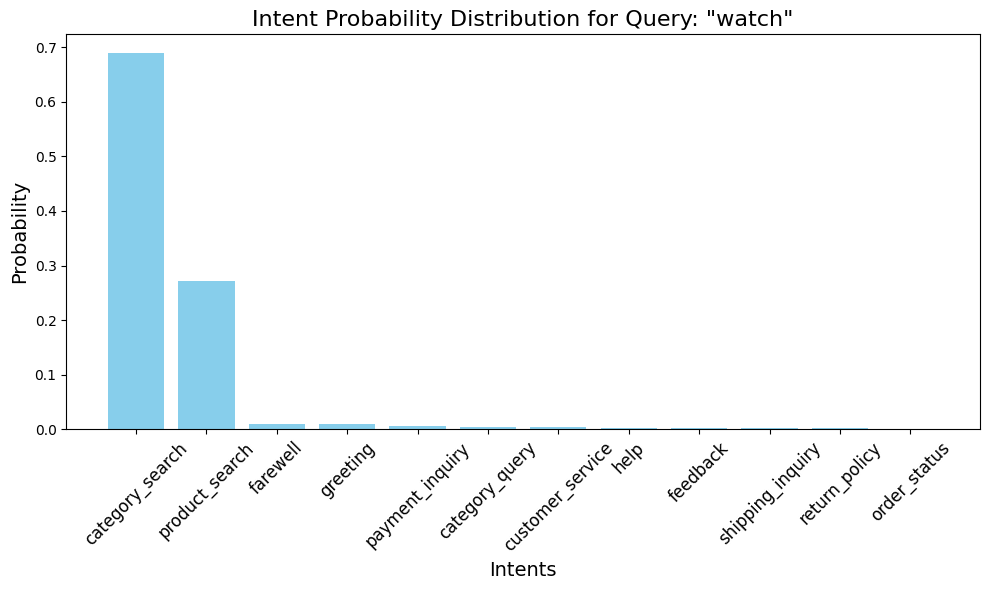

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def predict_intent_with_probabilities(query):
    # Preprocess the query
    query_tokens = preprocess_text(query)
    query_bow = vectorizer.transform([' '.join(query_tokens)])

    # Get probabilities for each intent
    class_probabilities = nb_classifier.predict_proba(query_bow)[0]
    intent_labels = label_encoder.classes_

    # Combine intents with their probabilities
    probabilities = {intent: prob for intent, prob in zip(intent_labels, class_probabilities)}
    return probabilities

# Get probabilities for the user query
query_probabilities = predict_intent_with_probabilities(user_query)

# Sort probabilities for better visualization
sorted_probabilities = dict(sorted(query_probabilities.items(), key=lambda item: item[1], reverse=True))

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.bar(sorted_probabilities.keys(), sorted_probabilities.values(), color='skyblue')
plt.xlabel('Intents', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title(f'Intent Probability Distribution for Query: "{user_query}"', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


In [21]:
import seaborn as sns

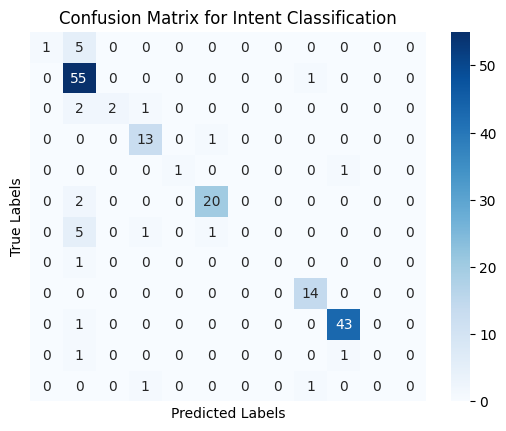

In [22]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[], 
            yticklabels=[])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Intent Classification')
plt.show()